<br><br>
<center>
Higor Grigorio dos Santos

# Morfologia

</center>

1. Implemente a erosão/dilatação utilizando os seguintes elementos estruturantes e utilize todas as imagens

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def erosion(image: np.ndarray, element: np.ndarray, iterations: int = 1):
    """
    The main porpoise of this function is centralize the logic of the erosion
    :param image:
    :param element:
    :return:
    """
    return cv2.erode(image, element, iterations=iterations)


def dilation(image: np.ndarray, element: np.ndarray, iterations: int = 1):
    """
    The main porpoise of this function is centralize the logic of the dilation
    :param image:
    :param element:
    :return:
    """
    return cv2.dilate(image, element, iterations=iterations)

In [3]:

def resolve(token: str):
    """
    The main porpoise of this function is centralize the logic of the morphological operations
    :param token:
    :return:
    """

    if token == '+':
        return np.array([
            [0, 1, 0],
            [1, 1, 1],
            [0, 1, 0]
        ], dtype=np.uint8)
    if token == '[]':
        return np.array([
            [1, 1, 1],
            [1, 1, 1],
            [1, 1, 1]
        ], dtype=np.uint8)
    if token == 'x':
        return np.array([
            [0, 0, 1, 0, 0],
            [0, 1, 1, 1, 0],
            [1, 1, 1, 1, 1],
            [0, 1, 1, 1, 0],
            [0, 0, 1, 0, 0]
        ], dtype=np.uint8)
    if token == 'I':
        return np.array([
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0]
        ], dtype=np.uint8)
    raise Exception('Invalid token')

In [4]:
def operation(image: np.ndarray, token: str, op: str):
    """
    The main porpoise of this function is centralize the logic of the morphological operations
    :param image:
    :param token:
    :param op:
    :return:
    """
    element = resolve(token)

    if op in globals():
        return globals()[op](image, element)

    raise Exception('Invalid operation')

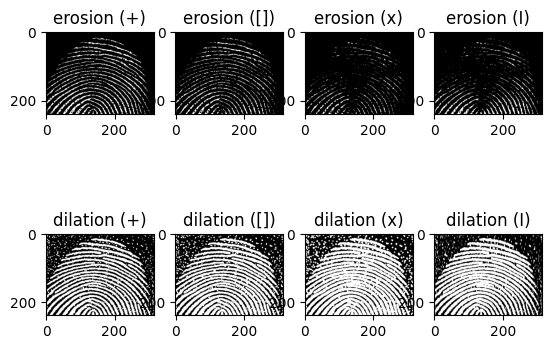

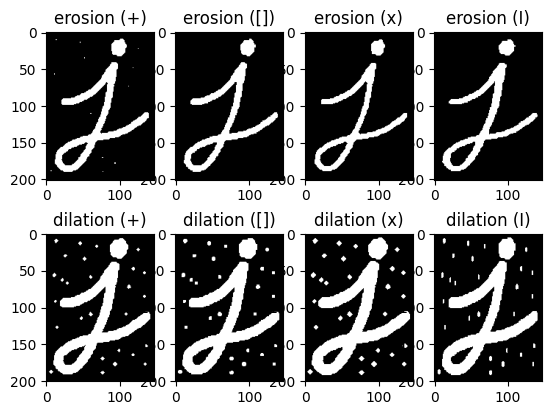

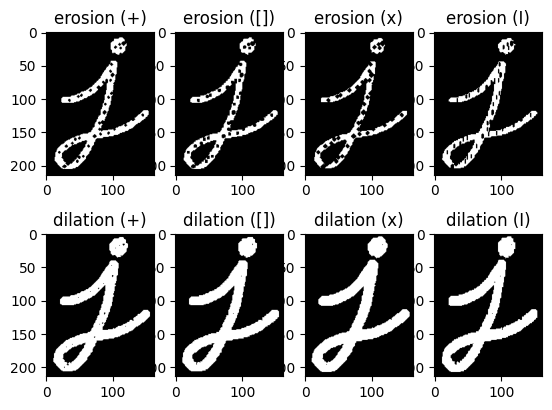

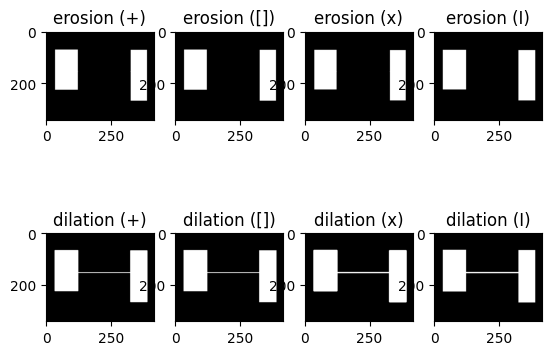

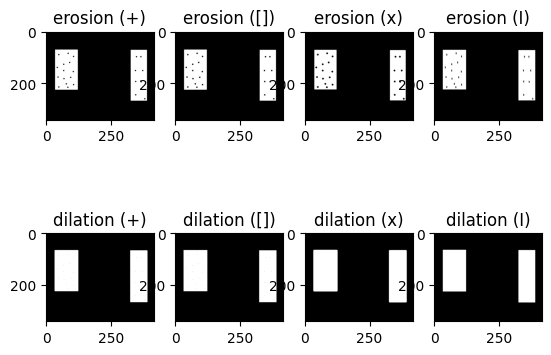

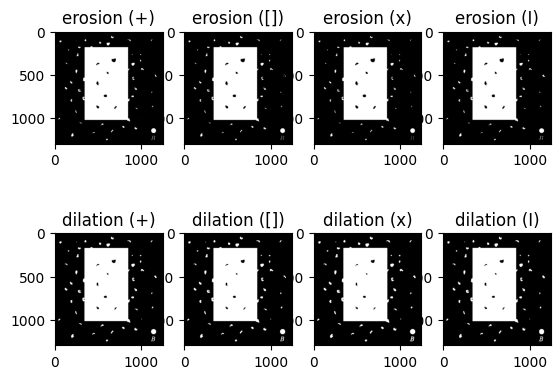

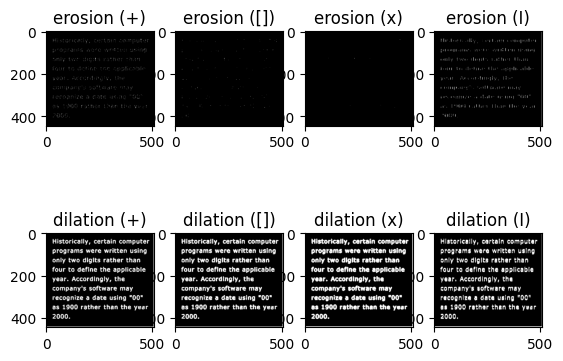

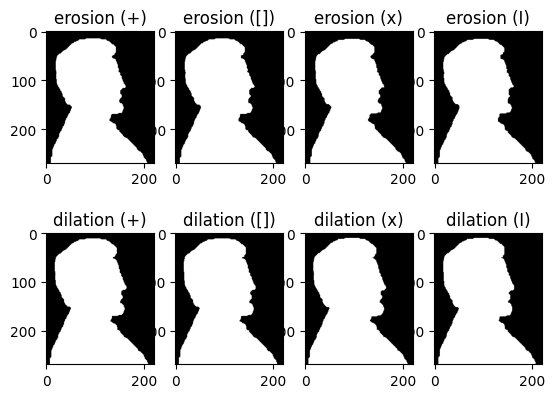

In [5]:
for file in os.listdir('./images'):
    image = np.array(cv2.imread(f'images/{file}', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
    i = 0

    for op in ['erosion', 'dilation']:
        j = 0
        for token in ['+', '[]', 'x', 'I']:
            result = operation(image, token, op)

            plt.subplot(2, 4, i + j + 1)
            plt.imshow(result, cmap='gray')
            plt.title(f'{op} ({token})')

            i += 1
    plt.show()

2. Implemente as operações de abertura e fechamento utilizando apenas o primeiro elemento estruturante do exercício acima.
Considerando as imagens de b) a e) quais imagens seria mais interessante utilizar a abertura e quais o fechamento para remover os ruídos?

In [6]:
def opening(img: np.ndarray, element: np.ndarray, iterations: int = 1):
    """
    The main porpoise of this function is centralize the logic of the opening
    :param img:
    :param element:
    :return:
    """
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, element, iterations=iterations)


def closing(img: np.ndarray, element: np.ndarray, iterations: int = 1):
    """
    The main porpoise of this function is centralize the logic of the closing
    :param img:
    :param element:
    :return:
    """
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, element, iterations=iterations)

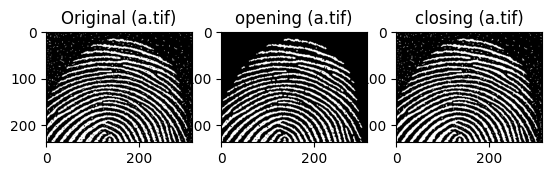

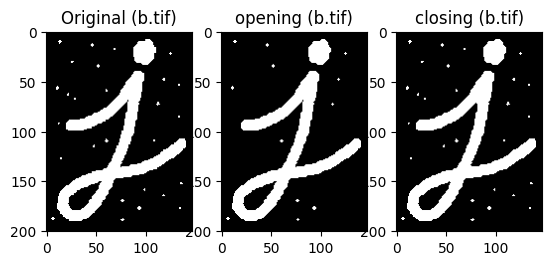

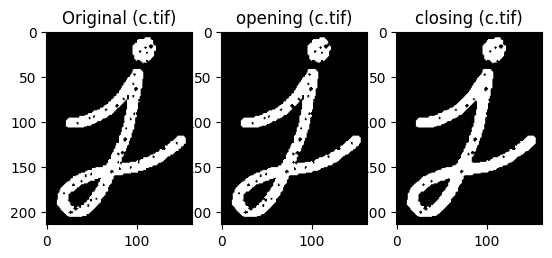

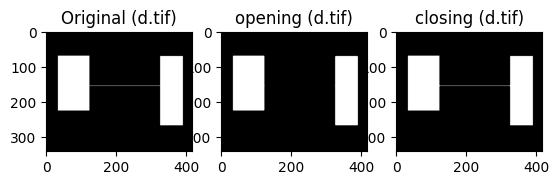

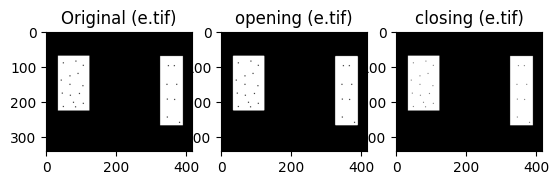

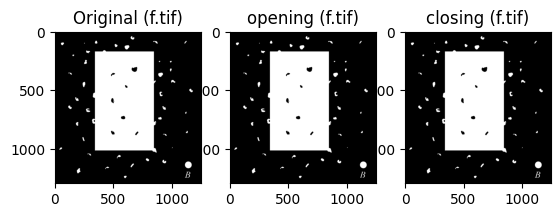

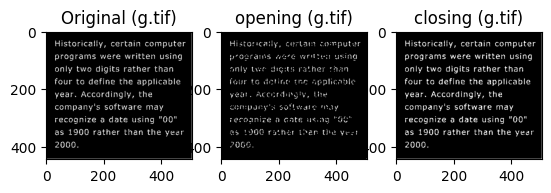

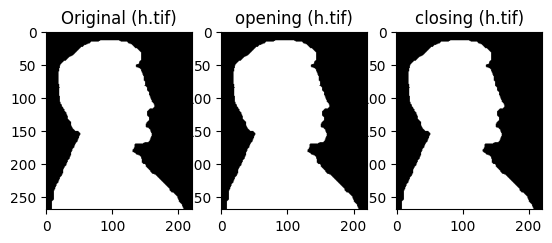

In [7]:
for file in os.listdir('./images'):
    img = cv2.imread(f'./images/{file}', cv2.IMREAD_GRAYSCALE)
    i = 1

    plt.subplot(1, 3, i)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original ({file})')

    for op in ['opening', 'closing']:
        result = operation(img, '+', op)

        plt.subplot(1, 3, i + 1)
        plt.imshow(result, cmap='gray')
        plt.title(f'{op} ({file})')

        i += 1
    plt.show()



Observando o resultado obtido, podemos concluir que a abertura é mais interessante para remover os ruídos externos as bordas
e o fechamento é mais interessante para remover os ruídos internos as bordas.

3. Qual sequência de operações poderia ser realizadas para que a imagem f) ficasse apenas com um retângulo branco ao centro? Implemente essas operações.

Aplicando abertura para remover os ruídos externos as bordas e depois dilatação para remover os ruídos internos as bordas.

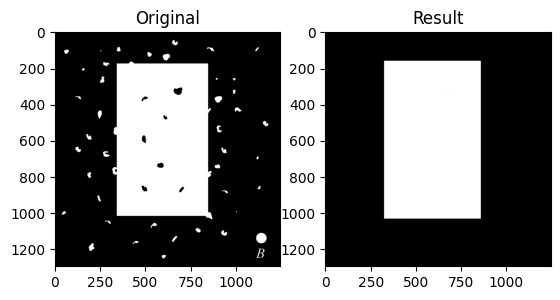

In [8]:
img = cv2.imread('./images/f.tif', cv2.IMREAD_GRAYSCALE).astype(np.uint8)

element = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
], dtype=np.uint8)

result = dilation(opening(img, element, 20), element, 5)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Result')

plt.show()


4. Qual(is) operações seriam necessárias para melhorar a imagem g)? Implemente essa(s) operação(ões)

A imagem (g) é constituída de textos, então a operação mais interessante seria a dilatação para engrossar os traços.

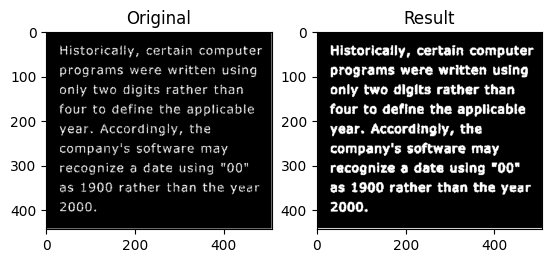

In [9]:
img = cv2.imread('./images/g.tif', cv2.IMREAD_GRAYSCALE).astype(np.uint8)

result = dilation(img, resolve('[]'), 1)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Result')

plt.show()

5. Quais operações seriam necessárias para extrair apenas a borda da imagem h)? Implemente essas operações

Utilizando a erosão para remover os traços internos e depois subtraindo da imagem original.

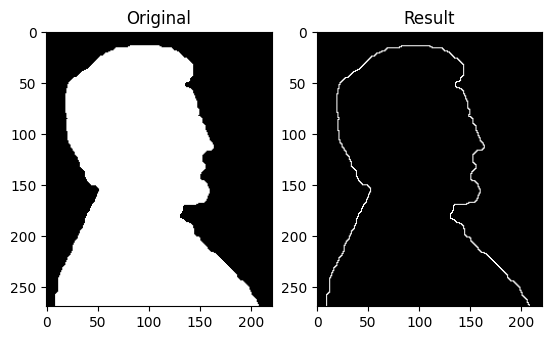

In [10]:
img = cv2.imread('./images/h.tif', cv2.IMREAD_GRAYSCALE).astype(np.uint8)

result = img - erosion(img, resolve('[]'), 1)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Result')

plt.show()